<left>FINM 36702 - Portfolio Credit Risk</left> 
<br>
<left>Spring 2023</left>

<h2><center> Homework 2 </center></h2>

<center>Due on Wednesday, Apr 4</center>

<h3><span style="color:#318ce7">Solution - Aman Krishna</span></h3>

<h3><span style="color:#318ce7">Email - amank@uchicago.edu</span></h3>

In [257]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import fsolve
from scipy.stats import multivariate_normal, norm
from plotnine import *

# First we experiment with the correlation matrix given in the slides and discussed in TA session to practice our functions and match the results with the slides.

In [258]:
pd1 = 0.1
pd2 = 0.2
pd3 = 0.3
pd4 = 0.4
rho12 = 0.1
rho13 = 0.2
rho14 = 0.3
rho23 = 0.4
rho24 = 0.5
rho34 = 0.6
z = multivariate_normal.rvs(mean=[0,0,0,0], cov=[[1,rho12,rho13,rho14],[rho12,1,rho23,rho24],[rho13,rho23,1,rho34],[rho14,rho24,rho34,1]], size=1000000)
invphipd1 = stats.norm.ppf(pd1)
invphipd2 = stats.norm.ppf(pd2)
invphipd3 = stats.norm.ppf(pd3)
invphipd4 = stats.norm.ppf(pd4)
defaults = np.zeros(10000)
for i in range(0,10000):
    if z[i,0] < invphipd1:
        defaults[i] += 1
    if z[i,1] < invphipd2:
        defaults[i] += 1
    if z[i,2] < invphipd3:
        defaults[i] += 1
    if z[i,3] < invphipd4:
        defaults[i] += 1
print(sum(defaults)/10000)
print(np.std(defaults))

1.0054
1.0806344617862231


In [259]:
def calculate_defaults(rhos, pd, N=10000):
    invphipd = norm.ppf(pd)
    num = len(pd)
    z = multivariate_normal.rvs(mean=np.zeros(num), cov=rhos,
                                 size=N, random_state=2)
    defaults = np.zeros(N)
    #create a default matrix
    default_yaz = np.zeros((N, num))
    for i in range(0,N):
        if z[i,0] < invphipd[0]:
            defaults[i] += 1
            default_yaz[i,0] = 1
        if z[i,1] < invphipd[1]:
            defaults[i] += 1
            default_yaz[i,1] = 1
        if z[i,2] < invphipd[2]:
            defaults[i] += 1
            default_yaz[i,2] = 1
        if z[i,3] < invphipd[3]:
            defaults[i] += 1
            default_yaz[i,3] = 1
        if len(invphipd) == 5:
            if z[i,4] < invphipd[4]:
                defaults[i] += 1
                default_yaz[i,4] = 1
    default_rate = sum(defaults)/N
    standard_deviation = np.std(defaults)
    return default_rate, standard_deviation, defaults, default_yaz

In [260]:
one = np.array([[1,0.1,0.2,0.3],[0.1,1,0.4,0.5],[0.2,0.4,1,0.6],[0.3,0.5,0.6,1]])
calculate_defaults(one, np.array([0.1,0.2,0.3,0.4]), 1000000)

(0.999883,
 1.0751320785424459,
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([[0., 1., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]))

In [261]:
two = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
calculate_defaults(two, np.array([0.1,0.2,0.3,0.4]))

(1.0021,
 0.8386272056164169,
 array([1., 3., 1., ..., 0., 1., 1.]),
 array([[0., 0., 1., 0.],
        [1., 1., 0., 1.],
        [0., 1., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]]))

#### 1. For the following collection of five firms, simulate 10,000 runs to find the standard deviation of the number of defaults. Simulate again to find the standard deviation of the number of defaults when all off-diagonal correlations are set equal to zero instead of the values shown.
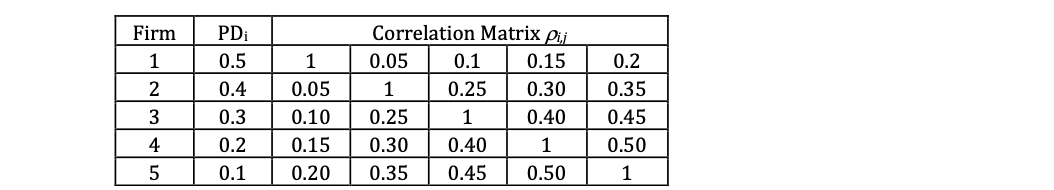

In [262]:
cov_matrix = np.array([[1,0.05,0.1,0.15,0.2],[0.05,1,0.25,0.3,0.35],[0.1,0.25,1,0.4,0.45],[0.15,0.3,0.4,1,0.5],[0.2,0.35,0.45,0.5,1]])
pd1 = np.array([0.5,0.4,0.3,0.2,0.1])

In [263]:
default_rate, std_dev, d, dyaz = calculate_defaults(cov_matrix, pd1)
print("The default rate is: ", default_rate)
print("The standard deviation is: ", std_dev)

The default rate is:  1.4967
The standard deviation is:  1.2053999792599965


In [264]:
#off diagonal elements are set to zero
cov_matrix_zero = np.array([[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])
default_rate1, std_dev1, _, _ = calculate_defaults(cov_matrix_zero, pd1)
print("The new default rate is: ", default_rate1)
print("The new standard deviation is: ", std_dev1)

The new default rate is:  1.5001
The new standard deviation is:  0.971905340040891


#### 2. In general, the standard deviation of the number of defaults—the risk, simply put—rises with correlation. Plot the standard deviation of the number of defaults in 1,000 simulation runs as a function of $\rho$ in the range [0, 0.95], where every off-diagonal element in the previous matrix is replaced by the value of $\rho$

In [265]:
#simulate a value of rho between [0,0.95] 20 times
rho = np.random.uniform(0,0.95,100)

#calculate the default rate and standard deviation for each rho
default_rate = np.zeros(100)
std_dev = np.zeros(100)
for i in range(0,100):
    #set all the off diagonal elements to rho
    cov_matrix_rho = np.array([[1,rho[i],rho[i],rho[i],rho[i]],[rho[i],1,rho[i],rho[i],rho[i]],[rho[i],rho[i],1,rho[i],rho[i]],[rho[i],rho[i],rho[i],1,rho[i]],[rho[i],rho[i],rho[i],rho[i],1]])
    default_rate[i], std_dev[i], _,_ = calculate_defaults(cov_matrix_rho, pd1, 1000)

/Users/amankrishna/opt/anaconda3/lib/python3.9/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


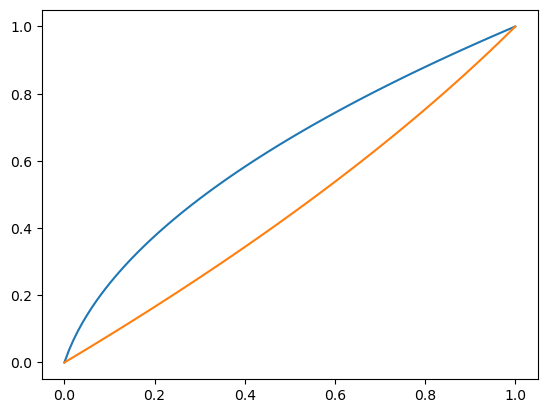

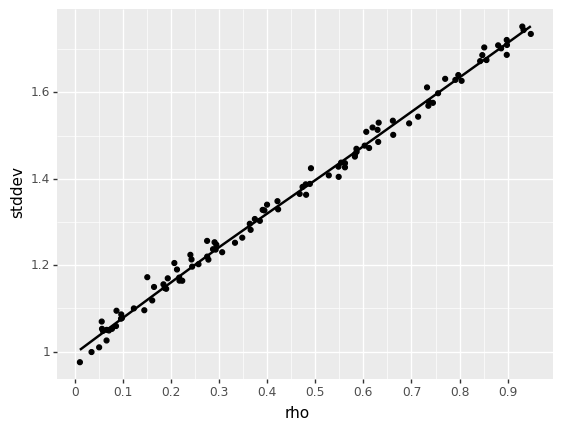

<ggplot: (744201674)>

In [266]:
df = pd.DataFrame({'rho': rho, 'stddev': std_dev})
ggplot(df, aes(x='rho', y='stddev')) + geom_point() + geom_smooth() + scale_x_continuous(breaks=np.arange(0,1,0.1))

#### 3. Assume the following portfolio. Exposures are stated in USD. Questions can be answered by simulation or calculation; each method provides a check on the other.

### 3.a Prob[ D4 = 1 and D5 = 1]? (What is PDJ for these two firms?)

### Calculation

In [267]:
pdj45 = multivariate_normal.cdf(mean=[0,0],cov=[[1,0.45],[0.45,1]],x=[norm.ppf(0.4),norm.ppf(0.5)])
print("The probability of default is: ", pdj45)

The probability of default is:  0.2717585211674835


### Simulation

In [268]:
cov_matrix_3 = np.array([[1,0.15, 0.2, 0.25, 0.3],[0.15,1,0.25,0.3,0.35],[0.2,0.25,1,0.35,0.4],[0.25,0.3,0.35,1,0.45],[0.3,0.35,0.4,0.45,1]])
pd_3 = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
default_rate_3, std_dev_3, defaults, defaults_matrix = calculate_defaults(cov_matrix_3, pd_3, 1000000)

In [269]:
#find the probability that the 4th and 5th loans default
prob_4_5 = np.zeros(1000000)
for i in range(0,1000000):
    if defaults_matrix[i,3] == 1 and defaults_matrix[i,4] == 1:
        prob_4_5[i] = 1

print(sum(prob_4_5)/1000000)

0.271564


### 3.b. Prob[ D4 = 1 and D5 = 1| D3 =1 ]? (That is, what is the probability that both Firm 4 and Firm 5 default, given that Firm 3 defaults?)

#### Calculation

In [270]:
pdj453 = multivariate_normal.cdf(mean=[0,0,0],cov=[[1,0.35,0.4],[0.35,1,0.45],[0.4,0.45,1]],x=[norm.ppf(0.3),norm.ppf(0.4),norm.ppf(0.5)])
pdj3 = multivariate_normal.cdf(mean=[0],cov=[[1]],x=[norm.ppf(0.3)])
print("The probability of default is: ", round(pdj453,3)/round(pdj3,3))

The probability of default is:  0.44333333333333336


#### Simulation

In [271]:
#find the probability that the 4th and 5th loans default given that the 3rd loan defaults
prob_4_5_3 = np.zeros(100000)
prob_3 = np.zeros(100000)
for i in range(0,100000):
    if defaults_matrix[i,2] == 1:
        if defaults_matrix[i,3] == 1 and defaults_matrix[i,4] == 1:
            prob_4_5_3[i] = 1

for i in range(0,100000):
    if defaults_matrix[i,2] == 1:
        prob_3[i] = 1

print(sum(prob_4_5_3)/sum(prob_3))

0.441309706215442


#### 3.c. What is the portfolio expected loss rate as a fraction of the $2800 exposure?

In [272]:
expected_loss = np.zeros(10000)
for i in range(0,10000):
    expected_loss[i] = defaults_matrix[i,0]*0.1*700 + defaults_matrix[i,1]*0.2*600 + defaults_matrix[i,2]*0.3*500 + defaults_matrix[i,3]*(0.4*400+0.6*200) + defaults_matrix[i,4]*(0.5*300+0.7*100)
    
print(np.mean(expected_loss)/2800)

0.10565571428571428


### 3.d. What is the correlation between D3 and D4?

In [273]:
pdj34 = multivariate_normal.cdf(mean=[0,0],cov=[[1,0.35],[0.35,1]],x=[norm.ppf(0.3),norm.ppf(0.4)])
print("The probability of default is: ", pdj34)

The probability of default is:  0.16888021346709658


In [274]:
dcorr34 = (pdj34 - 0.3*0.4)/np.sqrt(0.3*0.4*(1-0.3)*(1-0.4))
print("The correlation is: ", dcorr34)

The correlation is:  0.21772977593601078


In [275]:
#find the correlation between firm 3 and 4
corr_3_4 = np.corrcoef(defaults_matrix[:,2],defaults_matrix[:,3])
print(corr_3_4[0,1])

0.2193457173598065


### 4. Suppose that PDx=0.1, PDY=0.2, and the latent variables responsible for default obey the 36702 distribution: fx,y[ x, y ]= ( 1 + 3 x - y ) / 2. What are the values of PDJ, Dcorr, and ρ?

In [276]:
#As per the 36702 distributions

means = np.array([5/8,11/24])
variances = np.array([13/192,47/576])
correlation = 0.0700713
covariance = 1/192
cov_matrix_36702  = np.array([[variances[0],covariance],[covariance,variances[1]]])

In [277]:
cov_matrix_36702

array([[0.06770833, 0.00520833],
       [0.00520833, 0.08159722]])

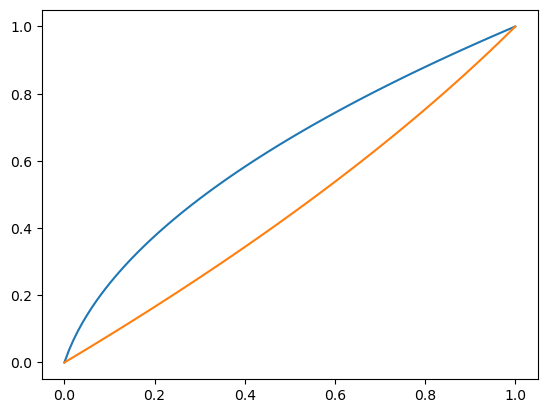

In [278]:
#define a joint cdf function Fxy[x_,y_]:=1/4x(2+3x-y)y
def Fxy(x,y):
    return 1/4*x*(2+3*x-y)*y

#def invers of Fx invFx[q_]:=1/6(-1+Sqrt[1+48q])
def invFx(q):
    return 1/6*(-1+np.sqrt(1+48*q))

#def invers of Fy invFy[q_]:=1/2(5-Sqrt[25-16q])
def invFy(q):
    return 1/2*(5-np.sqrt(25-16*q))

#Plot[invFx[q], {q, 0, 1}], Plot[invFy[q], {q, 0, 1}]
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
plt.plot(x, invFx(x))
plt.plot(y, invFy(y))
plt.show()

In [279]:
#find the invFx and invFy at 0.1 and 0.2
invFx_1 = invFx(0.1)
invFy_1 = invFy(0.2)
print("The inverse of Fx at 0.1 is: ", round(invFx_1,3))
print("The inverse of Fy at 0.2 is: ", round(invFy_1,3))

The inverse of Fx at 0.1 is:  0.235
The inverse of Fy at 0.2 is:  0.165


In [280]:
#Find the joint cdf at 0.1 and 0.2
Fxy_1 = Fxy(invFx_1,invFy_1)
print("The joint cdf PDJ at 0.1 and 0.2 is: ", round(Fxy_1,3))

The joint cdf PDJ at 0.1 and 0.2 is:  0.025


In [281]:
Dcorr = (Fxy_1 - 0.1*0.2)/(np.sqrt(0.1*0.2*(1-0.1)*(1-0.2)))
print("The Dcorr is: ", round(Dcorr,3))

The Dcorr is:  0.039


In [282]:
def f(rho, PD1=0.1, PD2=0.2, PDJ12=Fxy_1):
    return multivariate_normal(mean=[0,0], cov=[[1,rho],[rho,1]]).cdf([stats.norm.ppf(PD1),stats.norm.ppf(PD2)]) - PDJ12

In [283]:
rho12 = fsolve(f, 0.5)
print("The correlation between firm 1 and 2 is: ", round(rho12[0],3))

The correlation between firm 1 and 2 is:  0.09
